# Ridge Regression with k-fold cross validation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
# Import dataframe (without upper 1% of prices and without lat, lon column
dataframe = pd.read_csv("CurrentData/listings_drop_final.csv")
dataframe_specific = pd.read_csv("CurrentData/listings_specific.csv")

## First for data minus 1% upper outliers, without lat, lon, id

In [27]:
# Split data into train and test blocks
random_state = 42

df_train, df_test = train_test_split(dataframe, test_size = 0.2, random_state = random_state, shuffle = True)

In [28]:
# Split into features and target
def split_dataframe_Xy(df_train, df_test):
    # Split dataframe into features and target
    X_train = df_train.drop(columns = ["price"])
    y_train = df_train["price"] # Note: is now a pandas series, not a dataframe
    X_test = df_test.drop(columns = ["price"])
    y_test = df_test["price"] # Note: -//-

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_dataframe_Xy(df_train, df_test)

### 5-fold cross validation

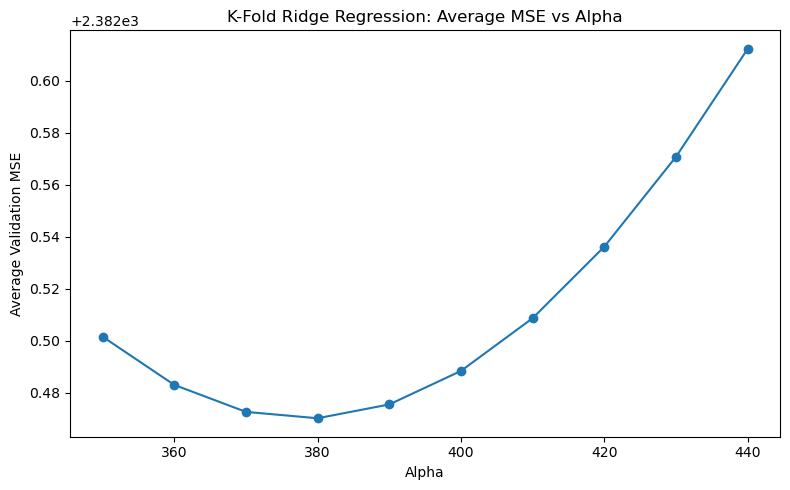

In [5]:
# Set Alpha range/ samples
alphas = np.arange(350, 450, 10)  # Try alphas from 500 to 700, in steps of 10

k = 5  # Number of folds
kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

# Store results as {alpha: list_of_mse_per_fold}
alpha_mse_results = {alpha: [] for alpha in alphas}

# Note: Below code DOES split train into train and val and then tests the alphas
for alpha in alphas:
    for train_index, val_index in kf.split(X_train):
        # Split into training and validation sets
        X_tr = X_train.iloc[train_index]
        X_val = X_train.iloc[val_index]
        y_tr = y_train.iloc[train_index]
        y_val = y_train.iloc[val_index]

        # Normalize and standardize features
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        # Train model
        model = Ridge(alpha = alpha)
        model.fit(X_tr_scaled, y_tr)

        # Predict and evaluate
        y_val_pred = model.predict(X_val_scaled)
        mse = mean_squared_error(y_val, y_val_pred)
        alpha_mse_results[alpha].append(mse)

# Compute average MSE for each alpha
#for alpha in alphas:
    #avg_mse = np.mean(alpha_mse_results[alpha])
    #print(f"Alpha {alpha}: Average Validation MSE = {avg_mse:.2f}")

# Compute average MSEs for plotting
avg_mses = [np.mean(alpha_mse_results[alpha]) for alpha in alphas]

# Plot
plt.figure(figsize = (8, 5))
plt.plot(alphas, avg_mses, marker = "o")
plt.xlabel("Alpha")
plt.ylabel("Average Validation MSE")
plt.title("K-Fold Ridge Regression: Average MSE vs Alpha")
plt.grid(False)
plt.tight_layout()
plt.show()

### 10-fold cross validation

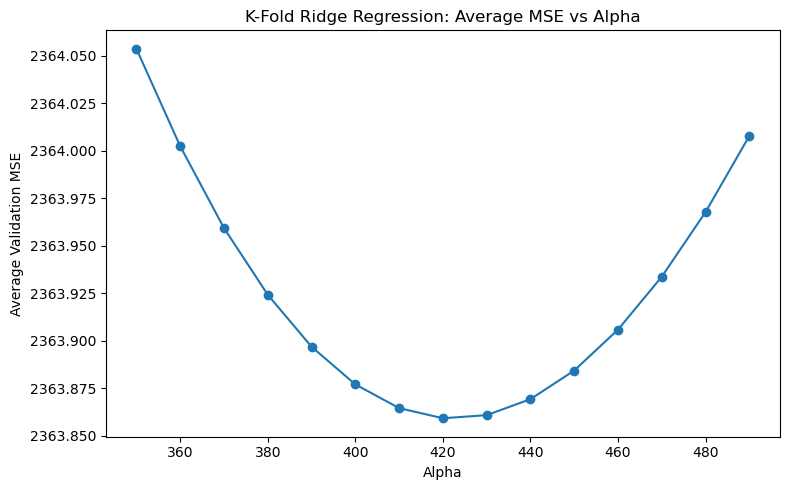

In [6]:
# Set Alpha range/ samples
alphas = np.arange(350, 500, 10)  # Try alphas from 500 to 700, in steps of 10

k = 10  # Number of folds
kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

# Store results as {alpha: list_of_mse_per_fold}
alpha_mse_results = {alpha: [] for alpha in alphas}

for alpha in alphas:
    for train_index, val_index in kf.split(X_train):
        # Split into training and validation sets
        X_tr = X_train.iloc[train_index]
        X_val = X_train.iloc[val_index]
        y_tr = y_train.iloc[train_index]
        y_val = y_train.iloc[val_index]

        # Normalize and standardize features
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        # Train model
        model = Ridge(alpha = alpha)
        model.fit(X_tr_scaled, y_tr)

        # Create prediction and compute mSE
        y_val_pred = model.predict(X_val_scaled)
        mse = mean_squared_error(y_val, y_val_pred)
        alpha_mse_results[alpha].append(mse)

# Compute average MSE for each alpha
#for alpha in alphas:
    #avg_mse = np.mean(alpha_mse_results[alpha])
    #print(f"Alpha {alpha}: Average Validation MSE = {avg_mse:.2f}")

# Compute average MSEs for plotting
avg_mses = [np.mean(alpha_mse_results[alpha]) for alpha in alphas]

# Plot
plt.figure(figsize = (8, 5))
plt.plot(alphas, avg_mses, marker = "o")
plt.xlabel("Alpha")
plt.ylabel("Average Validation MSE")
plt.title("K-Fold Ridge Regression: Average MSE vs Alpha")
plt.grid(False)
plt.tight_layout()
plt.show()

### Again test normal ridge regression (corresponds to single fold)

In [29]:
# Create split from original data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = random_state)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)

model = Ridge(alpha = 565) # ideal alpha from testing
model.fit(X_tr_scaled, y_tr)
y_val_pred = model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_val_pred)
print(f"MSE: {mse:.2f}")

MSE: 2103.33


## Test ideal alpha from k-fold cross-validation on testing data

<div style="font-size: 1.2em; font-weight: 500;">
Ideal alpha according to:<br>
normal ridge / 1-fold: 610 <br>
5-fold cross validation: 380 <br>
10-fold cross validation: 420 
</div>

#### Note: Use whole train+val data to fit the model

#### alpha = 610

In [31]:
# Normalize and standardize train+val data combined 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha = 610) # ideal alpha from testing
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

mar = mean_absolute_error(y_test, y_test_pred)
print(f"Mean absolute error: {mar:.2f}")

# Mean Relative Error
relative_errors = np.abs((y_test_pred - y_test) / y_test)
mre_p = np.mean(relative_errors) * 100
print(f"Mean Relative Error (MRE): {mre_p:.1f}%")

MSE: 2054.05
RMSE: 45.32
Mean absolute error: 32.29
Mean Relative Error (MRE): 35.6%


#### alpha = 380

In [32]:
# Normalize and standardize train+val data combined 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha = 380) # ideal alpha from testing
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

mar = mean_absolute_error(y_test, y_test_pred)
print(f"Mean absolute error: {mar:.2f}")

# Mean Relative Error
relative_errors = np.abs((y_test_pred - y_test) / y_test)
mre_p = np.mean(relative_errors) * 100
print(f"Mean Relative Error (MRE): {mre_p:.1f}%")

MSE: 2060.28
RMSE: 45.39
Mean absolute error: 32.39
Mean Relative Error (MRE): 35.8%


#### alpha = 420

In [33]:
# Normalize and standardize train+val data combined 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha = 420) # ideal alpha from testing
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

mar = mean_absolute_error(y_test, y_test_pred)
print(f"Mean absolute error: {mar:.2f}")

# Mean Relative Error
relative_errors = np.abs((y_test_pred - y_test) / y_test)
mre_p = np.mean(relative_errors) * 100
print(f"Mean Relative Error (MRE): {mre_p:.1f}%")

MSE: 2058.77
RMSE: 45.37
Mean absolute error: 32.37
Mean Relative Error (MRE): 35.7%


## MSE for listings_drop_final after cross validation: 2054-2060. The RMSE is always 45 and some change.

## Conclusion
<div style="font-size: 1.2em; font-weight: 500;">
We observe negligible differences in MSE on the test set for the different alphas. So cross validation did not yield any significant improvements for performance. <br>
On larger test datasets is probably still best to choose between 420 and 610 for alpha. With an alpha towards 420 likely bringing more robust performance.
</div>

# Repeat for listings_specific

In [34]:
# Split data into train and test blocks
random_state = 42

df_train, df_test = train_test_split(dataframe_specific, test_size = 0.2, random_state = random_state, shuffle = True)

In [35]:
X_train, y_train, X_test, y_test = split_dataframe_Xy(df_train, df_test)

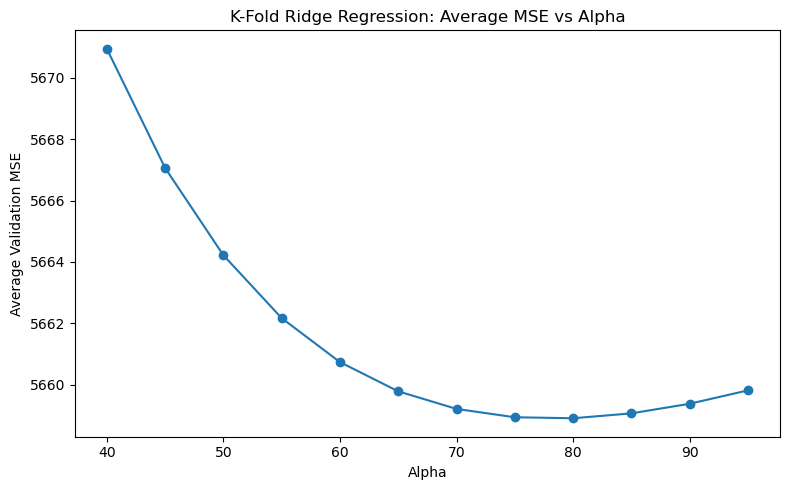

In [21]:
# Set Alpha range/ samples
alphas = np.arange(40, 100, 5)  # Try alphas from 500 to 700, in steps of 10

k = 5  # Number of folds
kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

# Store results as {alpha: list_of_mse_per_fold}
alpha_mse_results = {alpha: [] for alpha in alphas}

for alpha in alphas:
    for train_index, val_index in kf.split(X_train):
        # Split into training and validation sets
        X_tr = X_train.iloc[train_index]
        X_val = X_train.iloc[val_index]
        y_tr = y_train.iloc[train_index]
        y_val = y_train.iloc[val_index]

        # Normalize and standardize features
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        # Train model
        model = Ridge(alpha = alpha)
        model.fit(X_tr_scaled, y_tr)

        # Predict and evaluate
        y_val_pred = model.predict(X_val_scaled)
        mse = mean_squared_error(y_val, y_val_pred)
        alpha_mse_results[alpha].append(mse)

# Compute average MSE for each alpha
#for alpha in alphas:
    #avg_mse = np.mean(alpha_mse_results[alpha])
    #print(f"Alpha {alpha}: Average Validation MSE = {avg_mse:.2f}")

# Compute average MSEs for plotting
avg_mses = [np.mean(alpha_mse_results[alpha]) for alpha in alphas]

# Plot
plt.figure(figsize = (8, 5))
plt.plot(alphas, avg_mses, marker = "o")
plt.xlabel("Alpha")
plt.ylabel("Average Validation MSE")
plt.title("K-Fold Ridge Regression: Average MSE vs Alpha")
plt.grid(False)
plt.tight_layout()
plt.show()

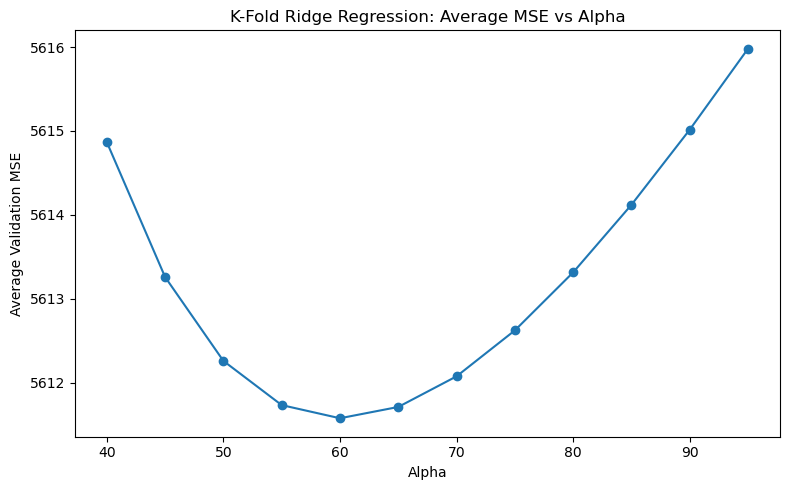

In [22]:
# Set Alpha range/ samples
alphas = np.arange(40, 100, 5)  # Try alphas from 500 to 700, in steps of 10

k = 10  # Number of folds
kf = KFold(n_splits = k, shuffle = True, random_state = random_state)

# Store results as {alpha: list_of_mse_per_fold}
alpha_mse_results = {alpha: [] for alpha in alphas}

for alpha in alphas:
    for train_index, val_index in kf.split(X_train):
        # Split into training and validation sets
        X_tr = X_train.iloc[train_index]
        X_val = X_train.iloc[val_index]
        y_tr = y_train.iloc[train_index]
        y_val = y_train.iloc[val_index]

        # Normalize and standardize features
        scaler = StandardScaler()
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)

        # Train model
        model = Ridge(alpha = alpha)
        model.fit(X_tr_scaled, y_tr)

        # Predict and evaluate
        y_val_pred = model.predict(X_val_scaled)
        mse = mean_squared_error(y_val, y_val_pred)
        alpha_mse_results[alpha].append(mse)


# Compute average MSEs for plotting
avg_mses = [np.mean(alpha_mse_results[alpha]) for alpha in alphas]

# Plot
plt.figure(figsize = (8, 5))
plt.plot(alphas, avg_mses, marker = "o")
plt.xlabel("Alpha")
plt.ylabel("Average Validation MSE")
plt.title("K-Fold Ridge Regression: Average MSE vs Alpha")
plt.grid(False)
plt.tight_layout()
plt.show()

#### alpha = 80

In [36]:
# Normalize and standardize train+val data combined 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha = 80) # ideal alpha from testing
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

mar = mean_absolute_error(y_test, y_test_pred)
print(f"Mean absolute error: {mar:.2f}")

# Mean Relative Error
relative_errors = np.abs((y_test_pred - y_test) / y_test)
mre_p = np.mean(relative_errors) * 100
print(f"Mean Relative Error (MRE): {mre_p:.1f}%")

MSE: 4279.32
RMSE: 65.42
Mean absolute error: 39.31
Mean Relative Error (MRE): 40.0%


#### alpha = 60

In [37]:
# Normalize and standardize train+val data combined 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha =60) # ideal alpha from testing
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse:.2f}")

rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

mar = mean_absolute_error(y_test, y_test_pred)
print(f"Mean absolute error: {mar:.2f}")

# Mean Relative Error
relative_errors = np.abs((y_test_pred - y_test) / y_test)
mre_p = np.mean(relative_errors) * 100
print(f"Mean Relative Error (MRE): {mre_p:.1f}%")

MSE: 4266.18
RMSE: 65.32
Mean absolute error: 39.30
Mean Relative Error (MRE): 40.1%


### RMSE of around 65 for 5 and 10 fold ridge regression on the specific id dataset

#### Comparison: RMSE 65.5 for normal ridge regression